In [6]:
import sys
import pickle
sys.path.append('../..')
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse 
from comp_models import ss, conf_ss, plot_comp, conf_all_models, ss_all_models

In [7]:
CITY = 2304400
CITY_NAME = 'Fortaleza'
STATE = 'CE'

There is some abreviations in this notebook: 
- **TL** refers to the transfer learning model;
- **NN** refers to the Bi-LSTM model;
- **ML** refers to the PGBM model; 
- **SS** refers to Skill Score. 

### Comp the predictions with loss = MSLE: 

We will analyse these data between '2022-01-02' e '2022-05-08':

In [8]:
with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
    data_nn = pickle.load(f)
    
doenca = 'dengue'
with open(f'../../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
        data_ml = pickle.load(f)

with open(f'../../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
        data_tl = pickle.load(f)

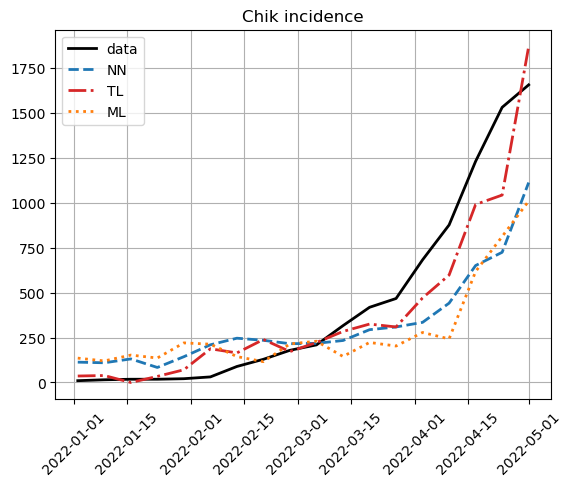

In [9]:
ini_evaluate = '2022-01-02'
end_evaluate = '2022-05-08'

plot_comp(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

In [10]:
conf_all_models(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

---------------------------
NN compared to ML:
lower: 0.03625127471898276
upper: 0.3745480120969852
---------------------------
TL compared to NN:
lower: 0.305245949487194
upper: 0.6787549863199265
---------------------------
TL compared to ML:
lower: 0.40109990128693973
upper: 0.7836309793148544
---------------------------


### Comp the predictions with the CUSTOM_MSLE:

In [11]:
with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
    data_nn = pickle.load(f)
    
doenca = 'dengue'
with open(f'../../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
        data_ml = pickle.load(f)
        
with open(f'../../predictions/lstm/tl_{CITY}_transf_custom_msle.pkl', 'rb') as f:
        data_tl = pickle.load(f)
        

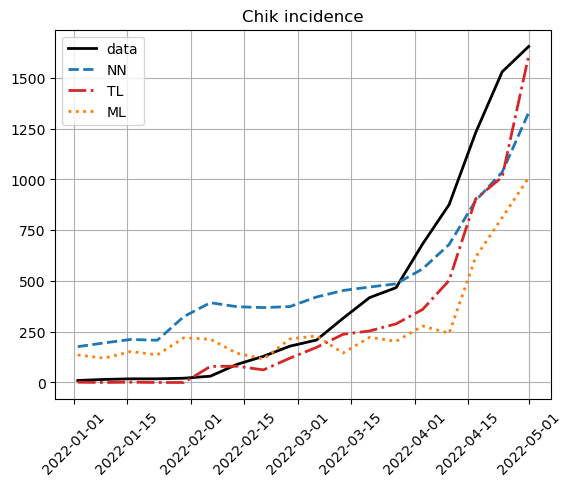

In [12]:
ini_evaluate = '2022-01-02'
end_evaluate = '2022-05-08'

plot_comp(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

In [13]:
conf_all_models(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

---------------------------
NN compared to ML:
lower: -0.8526147581482633
upper: 0.454107457395158
---------------------------
TL compared to NN:
lower: -0.011620695875120435
upper: 0.9055008951296192
---------------------------
TL compared to ML:
lower: 0.26357103764288725
upper: 0.8522315272663059
---------------------------


Let's make a plot comparing the performance of the MSLE and the custom MSLE models:

In [15]:
def plot_comp_losses(data_1, data_2, ini_evaluate, end_evaluate, t_d = True, label = 'NN'):
    plt.figure()
    
    plt.title('Chik incidence')
    
    if t_d == True: 
        ini_index =  data_1['indice'].index(datetime.date(datetime.strptime(ini_evaluate, '%Y-%m-%d')))
        end_index =  data_1['indice'].index(datetime.date(datetime.strptime(end_evaluate, '%Y-%m-%d')))

    else:
        ini_index = data_1['indice'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
        end_index = data_1['indice'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    plt.plot(data_1['indice'][ini_index:end_index], data_1['target'][ini_index - 7: end_index - 7, -1] * data_1['factor'] , color = 'black', label = 'data', linewidth=2)

    plt.plot(data_1['indice'][ini_index:end_index],data_1['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_1['factor'], label = f'{label} - MSLE', ls = 'dashed', linewidth=2)

    plt.plot(data_2['indice'][ini_index:end_index], data_2['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_2['factor'], label = f'{label} - Custom MSLE', linewidth=2,
                        color = 'tab:red', ls = 'dashdot')

    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

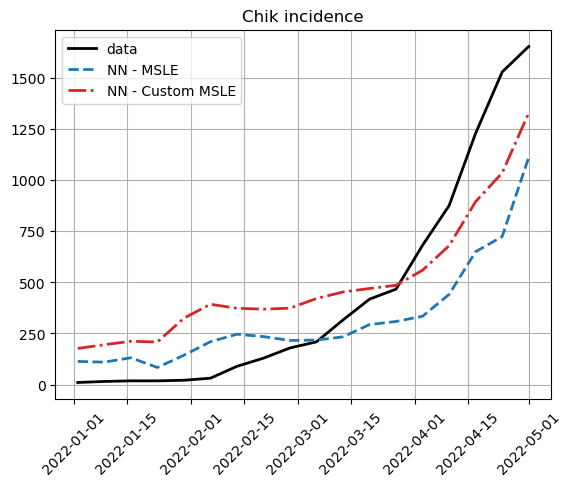

In [16]:
with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
    data_1 = pickle.load(f)
    
with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
    data_2 = pickle.load(f)
    
plot_comp_losses(data_1, data_2, ini_evaluate, end_evaluate, t_d = False, label = 'NN' )

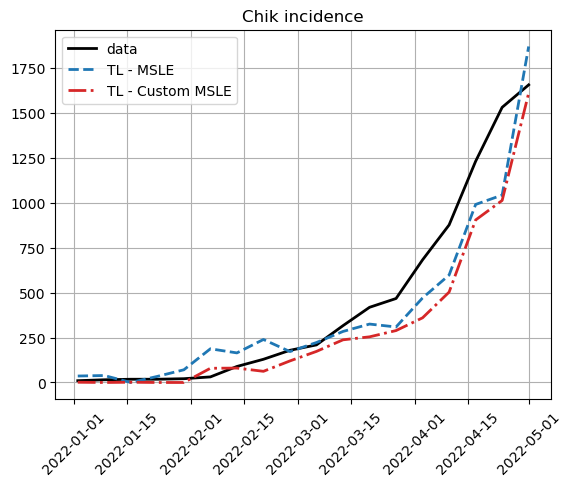

In [17]:
with open(f'../../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
        data_1 = pickle.load(f)
    
with open(f'../../predictions/lstm/tl_{CITY}_transf_custom_msle.pkl', 'rb') as f:
        data_2 = pickle.load(f)
    
plot_comp_losses(data_1, data_2, ini_evaluate, end_evaluate, label  = 'TL')

In [29]:

ini_index = data_1['indice'].index(datetime.date(datetime.strptime(ini_evaluate, '%Y-%m-%d')))

ini_index

312

In [17]:
data_1['indice']

[datetime.date(2016, 1, 3),
 datetime.date(2016, 1, 10),
 datetime.date(2016, 1, 17),
 datetime.date(2016, 1, 24),
 datetime.date(2016, 1, 31),
 datetime.date(2016, 2, 7),
 datetime.date(2016, 2, 14),
 datetime.date(2016, 2, 21),
 datetime.date(2016, 2, 28),
 datetime.date(2016, 3, 6),
 datetime.date(2016, 3, 13),
 datetime.date(2016, 3, 20),
 datetime.date(2016, 3, 27),
 datetime.date(2016, 4, 3),
 datetime.date(2016, 4, 10),
 datetime.date(2016, 4, 17),
 datetime.date(2016, 4, 24),
 datetime.date(2016, 5, 1),
 datetime.date(2016, 5, 8),
 datetime.date(2016, 5, 15),
 datetime.date(2016, 5, 22),
 datetime.date(2016, 5, 29),
 datetime.date(2016, 6, 5),
 datetime.date(2016, 6, 12),
 datetime.date(2016, 6, 19),
 datetime.date(2016, 6, 26),
 datetime.date(2016, 7, 3),
 datetime.date(2016, 7, 10),
 datetime.date(2016, 7, 17),
 datetime.date(2016, 7, 24),
 datetime.date(2016, 7, 31),
 datetime.date(2016, 8, 7),
 datetime.date(2016, 8, 14),
 datetime.date(2016, 8, 21),
 datetime.date(2016, 8,

Let's see the value of SS by period considering de CUSTOM LOSS MSLE: 

In [9]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-02-06'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: -0.515683942905252
---------------------------
TL compared to NN:
SS: 0.9229833252760248
---------------------------
TL compared to ML:
SS: 0.883267062784914
---------------------------


In [10]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-03-06'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: -0.9808242005902714
---------------------------
TL compared to NN:
SS: 0.851927812670364
---------------------------
TL compared to ML:
SS: 0.706695027903121
---------------------------


In [11]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-04-10'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: -0.18657903122219244
---------------------------
TL compared to NN:
SS: 0.456200030157778
---------------------------
TL compared to ML:
SS: 0.3547383586059588
---------------------------


In [12]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-05-08'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: 0.2790709675323213
---------------------------
TL compared to NN:
SS: 0.20915743926823338
---------------------------
TL compared to ML:
SS: 0.4298586378573861
---------------------------
